In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_data = pd.read_excel("Prospect theory- K17-PT định lượng (Câu trả lời).xlsx", sheet_name="Câu trả lời biểu mẫu 1")
print("Mẫu dữ liệu:")
display(test_data.head())

Mẫu dữ liệu:


,Dấu thời gian,"1. Tình huống 1 – Tiền (Lợi ích, xác suất nhỏ)","2. Tình huống 2 – Thời gian (Lợi ích, xác suất nhỏ)","3. Tình huống 3 – Tiền (Rủi ro vượt chi phí, xác suất nhỏ)","4. Tình huống 4 – Thời gian (Rủi ro trễ deadline, xác suất nhỏ)","5. Tình huống 5 – Tiền (Lợi ích, xác suất trung bình)","6. Tình huống 6 – Thời gian (Lợi ích, xác suất trung bình)","7. Tình huống 7 – Tiền (Rủi ro vượt chi phí, xác suất trung bình)","8. Tình huống 8 – Thời gian (Rủi ro trễ deadline, xác suất trung bình)",Giới tính,Tuổi,Ban tự đánh giá mình là người,"Mức độ tự tin khi đưa ra quyết định rủi ro (theo thang đo từ 1-5, với 1 là rất an toàn, 2 = an toàn, 3 = bình thường, 4 = ưa mạo hiểm, 5 = rất ưa mạo hiểm)"
0,2025-11-15 13:12:53.868,Chắc chắn mang về thêm 4 triệu đồng doanh thu.,Chắc chắn rút ngắn được 2 giờ làm việc.,Có 5% khả năng chiến dịch vượt ngân sách thêm ...,Có 5% khả năng chiến dịch bị trễ deadline 3 ng...,Chắc chắn mang về thêm 20 triệu đồng doanh thu.,"Có 50% khả năng rút ngắn được 1,5 ngày triển k...",Có 50% khả năng chiến dịch vượt ngân sách thêm...,"Có 50% khả năng chiến dịch trễ deadline 1,5 ng...",Nữ,21,Cẩn trọng,2
1,2025-11-15 13:13:36.973,Có 5% khả năng chiến dịch sẽ mang về thêm 80 t...,Có 5% khả năng bạn sẽ rút ngắn được 3 ngày làm...,Chắc chắn phải chi thêm 4 triệu đồng để giảm b...,Có 5% khả năng chiến dịch bị trễ deadline 3 ng...,Chắc chắn mang về thêm 20 triệu đồng doanh thu.,Chắc chắn rút ngắn được 1 ngày.,Chắc chắn phải chi thêm 20 triệu đồng để kiểm ...,Chắc chắn sẽ trễ thêm 1 ngày để đảm bảo chất l...,Nữ,21,Cẩn trọng,2
2,2025-11-15 13:14:40.798,Chắc chắn mang về thêm 4 triệu đồng doanh thu.,Có 5% khả năng bạn sẽ rút ngắn được 3 ngày làm...,Chắc chắn phải chi thêm 4 triệu đồng để giảm b...,Chắc chắn sẽ trễ thêm khoảng 2 giờ để kiểm duy...,Chắc chắn mang về thêm 20 triệu đồng doanh thu.,Chắc chắn rút ngắn được 1 ngày.,Có 50% khả năng chiến dịch vượt ngân sách thêm...,"Có 50% khả năng chiến dịch trễ deadline 1,5 ng...",Nam,21,Cẩn trọng,2
3,2025-11-15 13:14:51.610,Có 5% khả năng chiến dịch sẽ mang về thêm 80 t...,Chắc chắn rút ngắn được 2 giờ làm việc.,Chắc chắn phải chi thêm 4 triệu đồng để giảm b...,Có 5% khả năng chiến dịch bị trễ deadline 3 ng...,Có 50% khả năng chiến dịch mang về thêm 40 tri...,"Có 50% khả năng rút ngắn được 1,5 ngày triển k...",Có 50% khả năng chiến dịch vượt ngân sách thêm...,"Có 50% khả năng chiến dịch trễ deadline 1,5 ng...",Nữ,22,Cẩn trọng,3
4,2025-11-15 13:21:05.179,Chắc chắn mang về thêm 4 triệu đồng doanh thu.,Chắc chắn rút ngắn được 2 giờ làm việc.,Có 5% khả năng chiến dịch vượt ngân sách thêm ...,Có 5% khả năng chiến dịch bị trễ deadline 3 ng...,Có 50% khả năng chiến dịch mang về thêm 40 tri...,"Có 50% khả năng rút ngắn được 1,5 ngày triển k...",Chắc chắn phải chi thêm 20 triệu đồng để kiểm ...,"Có 50% khả năng chiến dịch trễ deadline 1,5 ng...",Nam,22,Ưa mạo hiểm,4


# 1. Tiền xử lý

In [3]:
# Hiểu biết cơ bản về dữ liệu
def basic_stats(df):
    print("\nCác cột trong bộ dữ liệu:")
    print(df.columns.tolist())
    print("\nThông tin tổng quan:")
    display(df.info())

    print("\nThống kê mô tả:")
    display(df.describe(include='all'))

    # --- Kiểm tra tỷ lệ thiếu dữ liệu ---
    print("\nTỷ lệ giá trị trống (%):")
    missing_ratio = (df.isnull().sum() / len(df)) * 100
    print(missing_ratio.round(2).sort_values(ascending=False))

    # --- Kiểm tra trùng lặp ---
    print("\nKiểm tra dữ liệu trùng lặp:")
    duplicate_count = df.duplicated().sum()
    print(f"Số dòng trùng lặp: {duplicate_count}")
    if duplicate_count > 0:
        print("\nCác dòng trùng lặp:")
        display(df[df.duplicated(keep=False)].head(20))

    # --- Kiểm tra giá trị duy nhất ---
    print("\nSố lượng giá trị duy nhất theo cột:")
    print(df.nunique())
    # --- Một số giá trị duy nhất mẫu ---
    print("\nMột vài giá trị mẫu của từng cột:")
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        print(f"{col}: {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")


In [4]:
print("Đánh giá dữ liệu trước khi tiền xử lý:")
basic_stats(test_data)

Đánh giá dữ liệu trước khi tiền xử lý:

Các cột trong bộ dữ liệu:
['Dấu thời gian', '1. Tình huống 1 – Tiền (Lợi ích, xác suất nhỏ)', '2. Tình huống 2 – Thời gian (Lợi ích, xác suất nhỏ)', '3. Tình huống 3 – Tiền (Rủi ro vượt chi phí, xác suất nhỏ)', '4. Tình huống 4 – Thời gian (Rủi ro trễ deadline, xác suất nhỏ)', '5. Tình huống 5 – Tiền (Lợi ích, xác suất trung bình)', '6. Tình huống 6 – Thời gian (Lợi ích, xác suất trung bình)', '7. Tình huống 7 – Tiền (Rủi ro vượt chi phí, xác suất trung bình)', '8. Tình huống 8 – Thời gian (Rủi ro trễ deadline, xác suất trung bình)', 'Giới tính', 'Tuổi', 'Ban tự đánh giá mình là người', 'Mức độ tự tin khi đưa ra quyết định rủi ro (theo thang đo từ 1-5, với 1 là rất an toàn, 2 = an toàn, 3 = bình thường, 4 = ưa mạo hiểm, 5 = rất ưa mạo hiểm)']

Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                                                                       

None


Thống kê mô tả:


,Dấu thời gian,"1. Tình huống 1 – Tiền (Lợi ích, xác suất nhỏ)","2. Tình huống 2 – Thời gian (Lợi ích, xác suất nhỏ)","3. Tình huống 3 – Tiền (Rủi ro vượt chi phí, xác suất nhỏ)","4. Tình huống 4 – Thời gian (Rủi ro trễ deadline, xác suất nhỏ)","5. Tình huống 5 – Tiền (Lợi ích, xác suất trung bình)","6. Tình huống 6 – Thời gian (Lợi ích, xác suất trung bình)","7. Tình huống 7 – Tiền (Rủi ro vượt chi phí, xác suất trung bình)","8. Tình huống 8 – Thời gian (Rủi ro trễ deadline, xác suất trung bình)",Giới tính,Tuổi,Ban tự đánh giá mình là người,"Mức độ tự tin khi đưa ra quyết định rủi ro (theo thang đo từ 1-5, với 1 là rất an toàn, 2 = an toàn, 3 = bình thường, 4 = ưa mạo hiểm, 5 = rất ưa mạo hiểm)"
count,55,55,55,55,55,55,55,55,55,55,55.0,55,55.000000
unique,NaN,2,2,2,2,2,2,2,2,2,6.0,2,NaN
top,NaN,Có 5% khả năng chiến dịch sẽ mang về thêm 80 t...,Có 5% khả năng bạn sẽ rút ngắn được 3 ngày làm...,Có 5% khả năng chiến dịch vượt ngân sách thêm ...,Chắc chắn sẽ trễ thêm khoảng 2 giờ để kiểm duy...,Có 50% khả năng chiến dịch mang về thêm 40 tri...,Chắc chắn rút ngắn được 1 ngày.,Có 50% khả năng chiến dịch vượt ngân sách thêm...,"Có 50% khả năng chiến dịch trễ deadline 1,5 ng...",Nữ,21.0,Cẩn trọng,NaN
freq,NaN,38,29,31,29,28,36,35,33,33,41.0,38,NaN
mean,2025-11-18 07:29:48.290108672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.090909
min,2025-11-15 13:12:53.868000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2025-11-16 15:38:53.038499840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,2025-11-17 14:05:27.792999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,2025-11-18 12:44:11.630500096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
max,2025-11-23 13:46:17.361000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000



Tỷ lệ giá trị trống (%):
Dấu thời gian                                                                                                                                                  0.0
1. Tình huống 1 – Tiền (Lợi ích, xác suất nhỏ)                                                                                                                 0.0
2. Tình huống 2 – Thời gian (Lợi ích, xác suất nhỏ)                                                                                                            0.0
3. Tình huống 3 – Tiền (Rủi ro vượt chi phí, xác suất nhỏ)                                                                                                     0.0
4. Tình huống 4 – Thời gian (Rủi ro trễ deadline, xác suất nhỏ)                                                                                                0.0
5. Tình huống 5 – Tiền (Lợi ích, xác suất trung bình)                                                                                                          

Dựa trên kết quả đánh giá sơ bộ, đây là các vấn đề của dữ liệu:

### 1. Dữ liệu cột "Tuổi" không đồng nhất
* **Vấn đề:** Cột `Tuổi` đang được nhận diện là kiểu `object` (chuỗi ký tự) thay vì `int` (số nguyên). Trong phần giá trị, xuất hiện giá trị `'21 tuổi '` nằm lẫn lộn với các số `21`, `22`, `18`...

### 2. Dữ liệu câu hỏi (Q1 - Q8) ở dạng văn bản dài

* **Vấn đề:** Các giá trị là câu văn đầy đủ (Ví dụ: *"Có 5% khả năng chiến dịch sẽ mang về..."* hoặc *"Chắc chắn mang về..."*).

### 3. Tên cột quá dài và chứa ký tự đặc biệt

* **Vấn đề:** Tên cột hiện tại bê nguyên văn từ Google Form (VD: `'1. Tình huống 1 – Tiền (Lợi ích, xác suất nhỏ)'`).

### 4. Các biến định danh (Categorical) chưa được chuẩn hóa số

* **Vấn đề:** Cột `Giới tính` ('Nam', 'Nữ') và `Ban tự đánh giá...` ('Cẩn trọng', 'Ưa mạo hiểm') vẫn ở dạng chữ. Tuy nhiên, trong phạm vi của bài phân tích, có thể không cần chuyển sang dạng số.

In [5]:
# Tiền xử lý dữ liệu
# 1. Hàm đổi tên cột
def rename_col(df):
    rename_map = {
        'Dấu thời gian': 'Timestamp',
        '1. Tình huống 1 – Tiền (Lợi ích, xác suất nhỏ)': 'Q1_Money_Gain_Small',
        '2. Tình huống 2 – Thời gian (Lợi ích, xác suất nhỏ)': 'Q2_Time_Gain_Small',
        '3. Tình huống 3 – Tiền (Rủi ro vượt chi phí, xác suất nhỏ)': 'Q3_Money_Loss_Small',
        '4. Tình huống 4 – Thời gian (Rủi ro trễ deadline, xác suất nhỏ)': 'Q4_Time_Loss_Small',
        '5. Tình huống 5 – Tiền (Lợi ích, xác suất trung bình)': 'Q5_Money_Gain_Med',
        '6. Tình huống 6 – Thời gian (Lợi ích, xác suất trung bình)': 'Q6_Time_Gain_Med',
        '7. Tình huống 7 – Tiền (Rủi ro vượt chi phí, xác suất trung bình)': 'Q7_Money_Loss_Med',
        '8. Tình huống 8 – Thời gian (Rủi ro trễ deadline, xác suất trung bình)': 'Q8_Time_Loss_Med',
        'Giới tính': 'Gender',
        'Tuổi': 'Age',
        'Ban tự đánh giá mình là người': 'Self_Assessment',
        'Mức độ tự tin khi đưa ra quyết định rủi ro (theo thang đo từ 1-5, với 1 là rất an toàn, 2 = an toàn, 3 = bình thường, 4 = ưa mạo hiểm, 5 = rất ưa mạo hiểm)': 'Confidence_Level'
    }

    df_clean = df.rename(columns=rename_map).copy()
    return df_clean

# 2. Hàm làm sạch tuổi
def clean_age(val):
    if pd.isna(val): return np.nan
    # Chuyển về chuỗi để xử lý
    val_str = str(val)
    # Chỉ giữ lại các ký tự là số (Ví dụ: "21 tuổi " -> "21")
    digits_only = ''.join(filter(str.isdigit, val_str))
    
    if digits_only == '': return np.nan
    return int(digits_only)

# 3. Hàm mã hóa: A (Rủi ro) = 1, B (An toàn) = 0
def encode_risk(val):
    val_str = str(val).lower()
    # Nếu câu trả lời chứa từ "chắc chắn" -> Chọn An toàn (0)
    if 'chắc chắn' in val_str:
        return 0 
    # Nếu câu trả lời chứa "khả năng" hoặc "%" -> Chọn Rủi ro (1)
    if 'khả năng' in val_str or '%' in val_str:
        return 1
    return None # Không xác định

# Hàm tiền xử lý tổng hợp
risk_cols = [
    'Q1_Money_Gain_Small', 'Q2_Time_Gain_Small', 
    'Q3_Money_Loss_Small', 'Q4_Time_Loss_Small', 
    'Q5_Money_Gain_Med', 'Q6_Time_Gain_Med', 
    'Q7_Money_Loss_Med', 'Q8_Time_Loss_Med'
]
def preprocess_data(df, risk_cols=risk_cols):
    df_clean = rename_col(df)
    df_clean['Age'] = df_clean['Age'].apply(clean_age)
    # Áp dụng mã hóa cho 8 câu hỏi (Q1-Q8)
    for col in risk_cols:
        df_clean[col] = df_clean[col].apply(encode_risk)
    display(df_clean.head())
    return df_clean

In [6]:
test_data_clean = preprocess_data(test_data)

,Timestamp,Q1_Money_Gain_Small,Q2_Time_Gain_Small,Q3_Money_Loss_Small,Q4_Time_Loss_Small,Q5_Money_Gain_Med,Q6_Time_Gain_Med,Q7_Money_Loss_Med,Q8_Time_Loss_Med,Gender,Age,Self_Assessment,Confidence_Level
0,2025-11-15 13:12:53.868,0,0,1,1,0,1,1,1,Nữ,21,Cẩn trọng,2
1,2025-11-15 13:13:36.973,1,1,0,1,0,0,0,0,Nữ,21,Cẩn trọng,2
2,2025-11-15 13:14:40.798,0,1,0,0,0,0,1,1,Nam,21,Cẩn trọng,2
3,2025-11-15 13:14:51.610,1,0,0,1,1,1,1,1,Nữ,22,Cẩn trọng,3
4,2025-11-15 13:21:05.179,0,0,1,1,1,1,0,1,Nam,22,Ưa mạo hiểm,4


In [7]:
# Kiểm tra dữ liệu sau tiền xử lý
print("Đánh giá dữ liệu sau khi tiền xử lý:")
basic_stats(test_data_clean)

Đánh giá dữ liệu sau khi tiền xử lý:

Các cột trong bộ dữ liệu:
['Timestamp', 'Q1_Money_Gain_Small', 'Q2_Time_Gain_Small', 'Q3_Money_Loss_Small', 'Q4_Time_Loss_Small', 'Q5_Money_Gain_Med', 'Q6_Time_Gain_Med', 'Q7_Money_Loss_Med', 'Q8_Time_Loss_Med', 'Gender', 'Age', 'Self_Assessment', 'Confidence_Level']

Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            55 non-null     datetime64[ns]
 1   Q1_Money_Gain_Small  55 non-null     int64         
 2   Q2_Time_Gain_Small   55 non-null     int64         
 3   Q3_Money_Loss_Small  55 non-null     int64         
 4   Q4_Time_Loss_Small   55 non-null     int64         
 5   Q5_Money_Gain_Med    55 non-null     int64         
 6   Q6_Time_Gain_Med     55 non-null     int64         
 7   Q7_Money_Loss_Med    55 non-null     int64         

None


Thống kê mô tả:


,Timestamp,Q1_Money_Gain_Small,Q2_Time_Gain_Small,Q3_Money_Loss_Small,Q4_Time_Loss_Small,Q5_Money_Gain_Med,Q6_Time_Gain_Med,Q7_Money_Loss_Med,Q8_Time_Loss_Med,Gender,Age,Self_Assessment,Confidence_Level
count,55,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55,55.000000,55,55.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nữ,NaN,Cẩn trọng,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,38,NaN
mean,2025-11-18 07:29:48.290108672,0.690909,0.527273,0.563636,0.472727,0.509091,0.345455,0.636364,0.600000,NaN,21.327273,NaN,3.090909
min,2025-11-15 13:12:53.868000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000,NaN,1.000000
25%,2025-11-16 15:38:53.038499840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,21.000000,NaN,3.000000
50%,2025-11-17 14:05:27.792999936,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,NaN,21.000000,NaN,3.000000
75%,2025-11-18 12:44:11.630500096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,21.000000,NaN,4.000000
max,2025-11-23 13:46:17.361000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,30.000000,NaN,5.000000



Tỷ lệ giá trị trống (%):
Timestamp              0.0
Q1_Money_Gain_Small    0.0
Q2_Time_Gain_Small     0.0
Q3_Money_Loss_Small    0.0
Q4_Time_Loss_Small     0.0
Q5_Money_Gain_Med      0.0
Q6_Time_Gain_Med       0.0
Q7_Money_Loss_Med      0.0
Q8_Time_Loss_Med       0.0
Gender                 0.0
Age                    0.0
Self_Assessment        0.0
Confidence_Level       0.0
dtype: float64

Kiểm tra dữ liệu trùng lặp:
Số dòng trùng lặp: 0

Số lượng giá trị duy nhất theo cột:
Timestamp              55
Q1_Money_Gain_Small     2
Q2_Time_Gain_Small      2
Q3_Money_Loss_Small     2
Q4_Time_Loss_Small      2
Q5_Money_Gain_Med       2
Q6_Time_Gain_Med        2
Q7_Money_Loss_Med       2
Q8_Time_Loss_Med        2
Gender                  2
Age                     5
Self_Assessment         2
Confidence_Level        5
dtype: int64

Một vài giá trị mẫu của từng cột:
Timestamp: <DatetimeArray>
['2025-11-15 13:12:53.868000', '2025-11-15 13:13:36.973000',
 '2025-11-15 13:14:40.798000', '2025-11-15 13:1

=> Bộ dữ liệu đã không còn những vấn đề đã được nêu trên.

# 2. Phân tích mô tả bộ dữ liệu

--- 1. PHÂN TÍCH NHÂN KHẨU HỌC ---


C:\Users\nguye\AppData\Local\Temp\ipykernel_25136\4120181515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Assessment', data=df, palette="viridis", ax=axes[1])


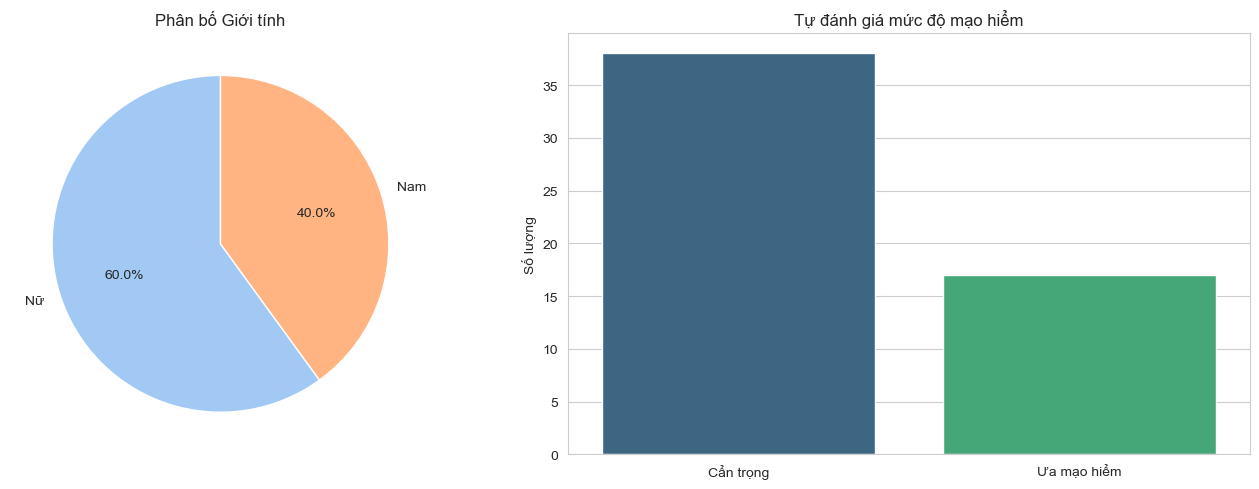


--- 2. TỶ LỆ CHẤP NHẬN RỦI RO TRUNG BÌNH (%) ---


,Mô tả,Tỷ lệ Rủi ro (%)
0,Tiền - Lãi Nhỏ,69.090909
1,Giờ - Lãi Nhỏ,52.727273
2,Tiền - Lỗ Nhỏ,56.363636
3,Giờ - Lỗ Nhỏ,47.272727
4,Tiền - Lãi TB,50.909091
5,Giờ - Lãi TB,34.545455
6,Tiền - Lỗ TB,63.636364
7,Giờ - Lỗ TB,60.000000


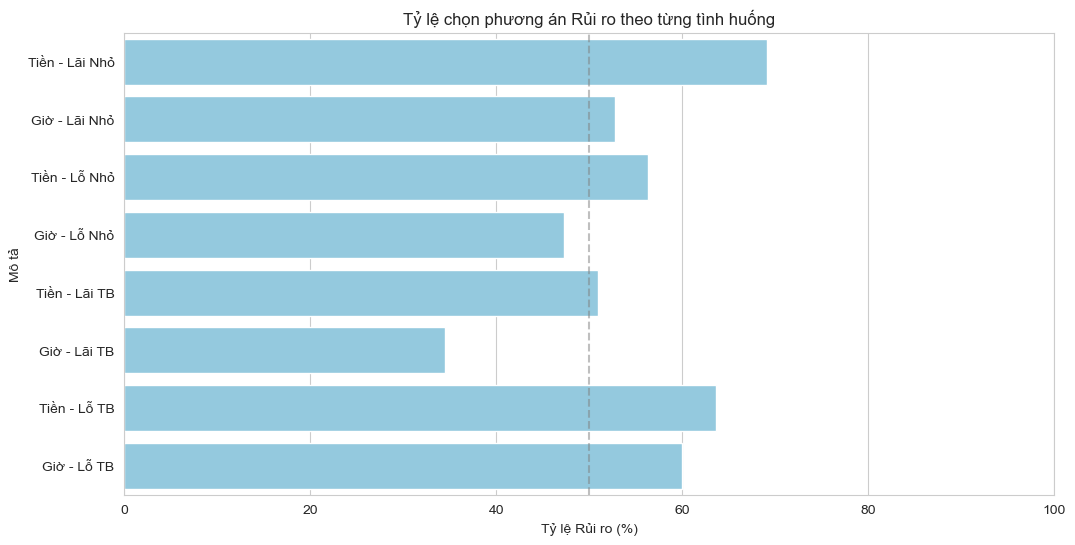


--- 3. SO SÁNH TIỀN VÀ THỜI GIAN (PAIRED T-TEST) ---
> Lợi ích nhỏ (5%): Tiền (69.1%) vs Thời gian (52.7%) | p-value=0.1066 -> Chưa có ý nghĩa
> Rủi ro nhỏ (5%): Tiền (56.4%) vs Thời gian (47.3%) | p-value=0.3218 -> Chưa có ý nghĩa
> Lợi ích TB (50%): Tiền (50.9%) vs Thời gian (34.5%) | p-value=0.0486 -> (*) Có ý nghĩa
> Rủi ro TB (50%): Tiền (63.6%) vs Thời gian (60.0%) | p-value=0.6738 -> Chưa có ý nghĩa


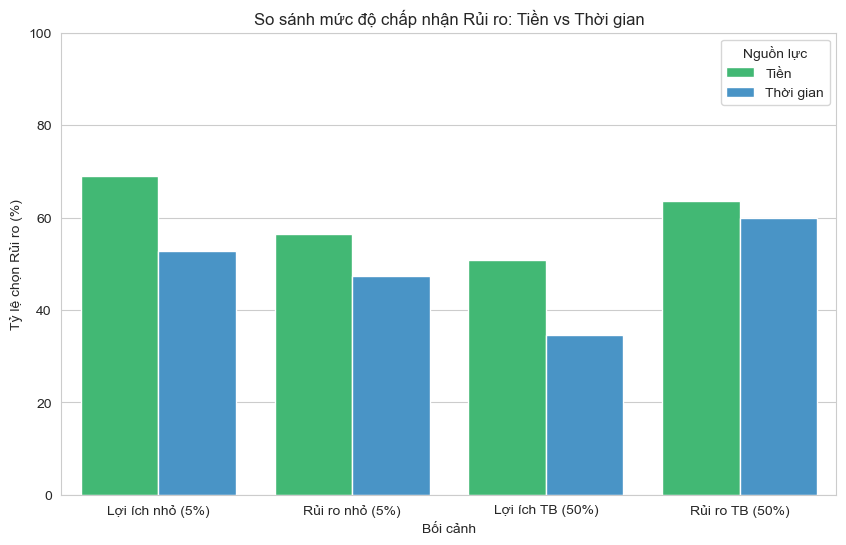


--- 4. PHÂN TÍCH TƯƠNG QUAN (CORRELATION) ---


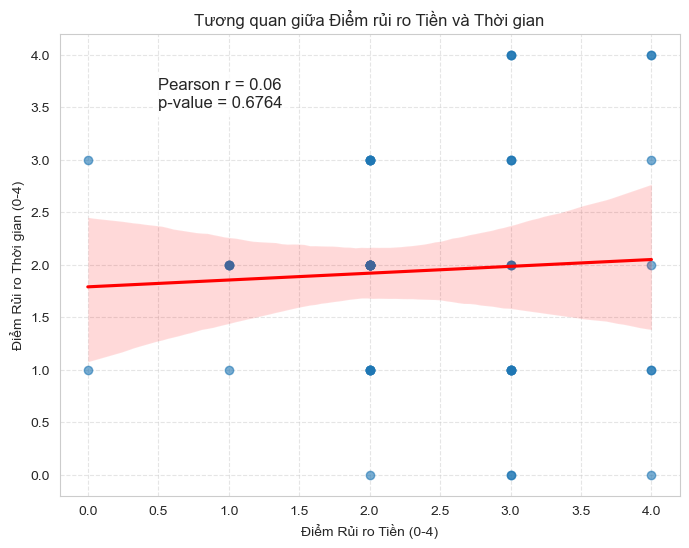

In [8]:
# Cấu hình giao diện biểu đồ
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

def analyze_demographics(df):
    """Phân tích và vẽ biểu đồ nhân khẩu học"""
    print("--- 1. PHÂN TÍCH NHÂN KHẨU HỌC ---")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Biểu đồ Giới tính
    gender_counts = df['Gender'].value_counts()
    axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[0].set_title('Phân bố Giới tính')
    
    # Biểu đồ Tự đánh giá
    sns.countplot(x='Self_Assessment', data=df, palette="viridis", ax=axes[1])
    axes[1].set_title('Tự đánh giá mức độ mạo hiểm')
    axes[1].set_ylabel('Số lượng')
    axes[1].set_xlabel('')
    plt.tight_layout()
    plt.show()

def analyze_general_risk(df, risk_cols):
    """Thống kê tỷ lệ chọn rủi ro chung cho từng câu hỏi"""
    print("\n--- 2. TỶ LỆ CHẤP NHẬN RỦI RO TRUNG BÌNH (%) ---")
    
    # Tính toán
    risk_means = df[risk_cols].mean() * 100
    risk_df = risk_means.reset_index()
    risk_df.columns = ['Câu hỏi', 'Tỷ lệ Rủi ro (%)']
    
    # Thêm cột mô tả ngắn gọn để vẽ biểu đồ cho đẹp
    short_labels = [
        'Tiền - Lãi Nhỏ', 'Giờ - Lãi Nhỏ',
        'Tiền - Lỗ Nhỏ', 'Giờ - Lỗ Nhỏ',
        'Tiền - Lãi TB', 'Giờ - Lãi TB',
        'Tiền - Lỗ TB', 'Giờ - Lỗ TB'
    ]
    risk_df['Mô tả'] = short_labels
    
    # In số liệu
    display(risk_df[['Mô tả', 'Tỷ lệ Rủi ro (%)']])
    
    # Vẽ biểu đồ cột
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tỷ lệ Rủi ro (%)', y='Mô tả', data=risk_df, color='skyblue')
    plt.title('Tỷ lệ chọn phương án Rủi ro theo từng tình huống')
    plt.xlim(0, 100)
    plt.axvline(50, color='gray', linestyle='--', alpha=0.5) # Đường trung bình 50%
    plt.show()

def compare_money_time(df):
    """So sánh đối xứng Tiền vs Thời gian (T-test & Biểu đồ)"""
    print("\n--- 3. SO SÁNH TIỀN VÀ THỜI GIAN (PAIRED T-TEST) ---")
    
    pairs = [
        ('Q1_Money_Gain_Small', 'Q2_Time_Gain_Small', 'Lợi ích nhỏ (5%)'),
        ('Q3_Money_Loss_Small', 'Q4_Time_Loss_Small', 'Rủi ro nhỏ (5%)'),
        ('Q5_Money_Gain_Med', 'Q6_Time_Gain_Med', 'Lợi ích TB (50%)'),
        ('Q7_Money_Loss_Med', 'Q8_Time_Loss_Med', 'Rủi ro TB (50%)')
    ]
    
    comparison_data = []
    
    for m_col, t_col, label in pairs:
        # T-test
        pair_df = df[[m_col, t_col]].dropna()
        stat, p_val = stats.ttest_rel(pair_df[m_col], pair_df[t_col])
        
        # Lưu dữ liệu để vẽ
        mean_m = pair_df[m_col].mean() * 100
        mean_t = pair_df[t_col].mean() * 100
        
        comparison_data.append({'Bối cảnh': label, 'Nguồn lực': 'Tiền', 'Tỷ lệ Rủi ro': mean_m})
        comparison_data.append({'Bối cảnh': label, 'Nguồn lực': 'Thời gian', 'Tỷ lệ Rủi ro': mean_t})
        
        sig = "(*) Có ý nghĩa" if p_val < 0.05 else "Chưa có ý nghĩa"
        print(f"> {label}: Tiền ({mean_m:.1f}%) vs Thời gian ({mean_t:.1f}%) | p-value={p_val:.4f} -> {sig}")

    # Vẽ biểu đồ so sánh nhóm (Grouped Bar Chart)
    comp_df = pd.DataFrame(comparison_data)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Bối cảnh', y='Tỷ lệ Rủi ro', hue='Nguồn lực', data=comp_df, palette=['#2ecc71', '#3498db'])
    plt.title('So sánh mức độ chấp nhận Rủi ro: Tiền vs Thời gian')
    plt.ylabel('Tỷ lệ chọn Rủi ro (%)')
    plt.legend(title='Nguồn lực')
    plt.ylim(0, 100)
    plt.show()

def analyze_consistency(df):
    """Phân tích tương quan và nhất quán"""
    print("\n--- 4. PHÂN TÍCH TƯƠNG QUAN (CORRELATION) ---")
    
    # Tính điểm tổng
    df['Risk_Score_Money'] = df[['Q1_Money_Gain_Small', 'Q3_Money_Loss_Small', 'Q5_Money_Gain_Med', 'Q7_Money_Loss_Med']].sum(axis=1)
    df['Risk_Score_Time'] = df[['Q2_Time_Gain_Small', 'Q4_Time_Loss_Small', 'Q6_Time_Gain_Med', 'Q8_Time_Loss_Med']].sum(axis=1)
    
    # Vẽ biểu đồ phân tán (Scatter Plot) với đường hồi quy
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Risk_Score_Money', y='Risk_Score_Time', data=df, 
                scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title('Tương quan giữa Điểm rủi ro Tiền và Thời gian')
    plt.xlabel('Điểm Rủi ro Tiền (0-4)')
    plt.ylabel('Điểm Rủi ro Thời gian (0-4)')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Tính hệ số tương quan
    corr, p_val = stats.pearsonr(df['Risk_Score_Money'], df['Risk_Score_Time'])
    plt.text(0.5, 3.5, f'Pearson r = {corr:.2f}\np-value = {p_val:.4f}', 
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

# --- THỰC THI CÁC HÀM ---
analyze_demographics(test_data_clean)
analyze_general_risk(test_data_clean, risk_cols)
compare_money_time(test_data_clean)
analyze_consistency(test_data_clean)

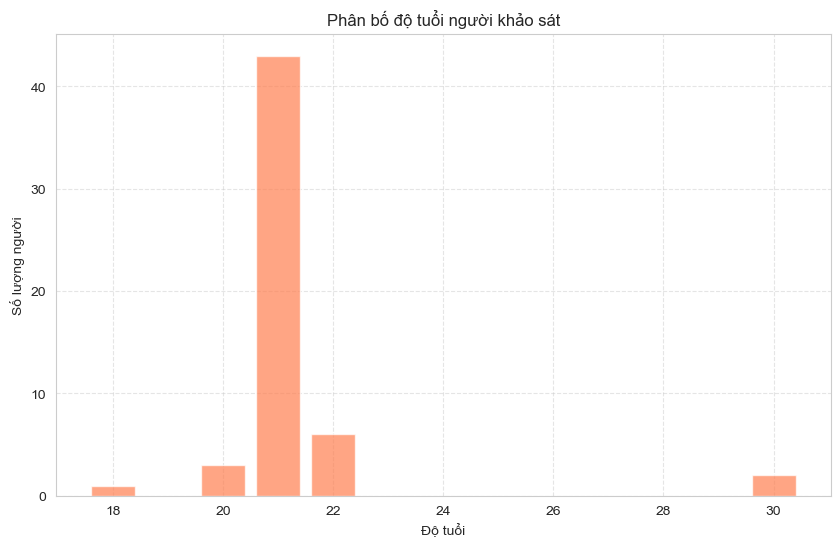

In [17]:
# Thống kê số người khảo sát theo độ tuổi
def age_distribution(df):
    """Phân tích và vẽ biểu đồ phân bố độ tuổi"""
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Age'].value_counts().sort_index().index, 
            df['Age'].value_counts().sort_index().values, color='coral', alpha=0.7)
    plt.title('Phân bố độ tuổi người khảo sát')
    plt.xlabel('Độ tuổi')
    plt.ylabel('Số lượng người')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
age_distribution(test_data_clean)

Do nghiên cứu nhắm đến đối tượng là GenZ => có 1 số khảo sát với tuổi 30 sẽ không ảnh hưởng đến kết quả.

# 3. Kiểm định các giả thuyết

## 3.1. Có sự khác biệt trong lựa chọn tiền vs thời gian khi có cùng xác suất không?

H1a: Tại xác suất nhỏ (5%) - Lợi ích: Thái độ với Tiền khác Thái độ với Thời gian.

H1b: Tại xác suất nhỏ (5%) - Rủi ro: Thái độ với Tiền khác Thái độ với Thời gian.

H1c: Tại xác suất TB (50%) - Lợi ích: Thái độ với Tiền khác Thái độ với Thời gian.

H1d: Tại xác suất TB (50%) - Rủi ro: Thái độ với Tiền khác Thái độ với Thời gian.

In [10]:
# Kiểm định Paired Sample T-test giữa Tiền và Thời gian
# Danh sách 4 cặp so sánh đối xứng (Cùng xác suất, Cùng khung)
# Cấu trúc: (Biến Tiền, Biến Thời gian, Mô tả điều kiện)
comparisons = [
    ('Q1_Money_Gain_Small', 'Q2_Time_Gain_Small', 'Lợi ích - Xác suất 5%'),
    ('Q3_Money_Loss_Small', 'Q4_Time_Loss_Small', 'Tổn thất - Xác suất 5%'),
    ('Q5_Money_Gain_Med',   'Q6_Time_Gain_Med',   'Lợi ích - Xác suất 50%'),
    ('Q7_Money_Loss_Med',   'Q8_Time_Loss_Med',   'Tổn thất - Xác suất 50%')
]

print("Kết quả kiểm định Paired Sample T-test giữa Tiền và Thời gian:")
print(f"{'Điều kiện (Cùng Xác Suất)':<30} | {'Mean Tiền':<10} | {'Mean Giờ':<10} | {'Chênh lệch':<10} | {'P-value':<10} | {'Kết luận'}")
print("-" * 100)

for money_col, time_col, desc in comparisons:
    # Lọc dữ liệu sạch (loại bỏ NaN nếu có)
    data_pair = test_data_clean[[money_col, time_col]].dropna()
    
    if len(data_pair) > 0:
        # Thực hiện Paired T-test
        t_stat, p_val = stats.ttest_rel(data_pair[money_col], data_pair[time_col])
        # Tính giá trị trung bình (Mean)
        mean_m = data_pair[money_col].mean()
        mean_t = data_pair[time_col].mean()
        diff = mean_m - mean_t  # Dương nghĩa là sẽ chọn rủi ro với TIỀN nhiều hơn
        # Biện luận kết quả
        if p_val < 0.05:
            sig = "(*) KHÁC BIỆT"
        elif p_val < 0.1:
            sig = "Khác biệt biên"
        else:
            sig = "Không khác biệt"
        print(f"{desc:<30} | {mean_m:.3f}      | {mean_t:.3f}      | {diff:+.3f}      | {p_val:.4f}     | {sig}")
    else:
        print(f"{desc}: Không đủ dữ liệu.")

print("-" * 100)
print("Ghi chú:")
print("Mean: Tỷ lệ chọn phương án Rủi ro (0 -> 1).")
print("Chênh lệch (+): Sinh viên chọn rủi ro với TIỀN nhiều hơn.")
print("Chênh lệch (-): Sinh viên chọn rủi ro với THỜI GIAN nhiều hơn.")
print("(*) KHÁC BIỆT: P-value < 0.05 (Có ý nghĩa thống kê).")

Kết quả kiểm định Paired Sample T-test giữa Tiền và Thời gian:
Điều kiện (Cùng Xác Suất)      | Mean Tiền  | Mean Giờ   | Chênh lệch | P-value    | Kết luận
----------------------------------------------------------------------------------------------------
Lợi ích - Xác suất 5%          | 0.691      | 0.527      | +0.164      | 0.1066     | Không khác biệt
Tổn thất - Xác suất 5%         | 0.564      | 0.473      | +0.091      | 0.3218     | Không khác biệt
Lợi ích - Xác suất 50%         | 0.509      | 0.345      | +0.164      | 0.0486     | (*) KHÁC BIỆT
Tổn thất - Xác suất 50%        | 0.636      | 0.600      | +0.036      | 0.6738     | Không khác biệt
----------------------------------------------------------------------------------------------------
Ghi chú:
Mean: Tỷ lệ chọn phương án Rủi ro (0 -> 1).
Chênh lệch (+): Sinh viên chọn rủi ro với TIỀN nhiều hơn.
Chênh lệch (-): Sinh viên chọn rủi ro với THỜI GIAN nhiều hơn.
(*) KHÁC BIỆT: P-value < 0.05 (Có ý nghĩa thống kê).


### 1. Cơ sở đánh giá thống kê

* **Mức ý nghĩa ():** Thiết lập ở mức tiêu chuẩn là **0.05 (5%)**.
* **Quy tắc bác bỏ:**
* Nếu ****: Có đủ bằng chứng thống kê để **bác bỏ Giả thuyết không ()** và **chấp nhận Giả thuyết đối ()**. Kết luận là có sự khác biệt có ý nghĩa.
* Nếu ****: Không đủ bằng chứng để bác bỏ . Kết luận là sự khác biệt (nếu có) chỉ là ngẫu nhiên hoặc chưa đủ lớn về mặt thống kê.

### 2. Giải thích kết quả

#### Cặp 1: Bối cảnh Lợi ích - Xác suất nhỏ (5%)

* **Số liệu:** Trung bình (Mean) của Tiền là , trong khi Thời gian là . Mức chênh lệch là  (nghiêng về Tiền).
* **Kết quả kiểm định:** .
* **Giải thích:** Mặc dù về mặt số học, tỷ lệ chấp nhận rủi ro đối với Tiền cao hơn Thời gian khoảng , tuy nhiên giá trị . Điều này cho thấy sự chênh lệch này chưa đạt ngưỡng ý nghĩa thống kê. Chúng ta coi sự khác biệt này là không đáng kể hoặc do biến động ngẫu nhiên của mẫu.
* **Kết luận giả thuyết ():** **KHÔNG CHẤP NHẬN**. Chưa đủ bằng chứng để khẳng định thái độ rủi ro khác nhau giữa Tiền và Thời gian ở điều kiện này.

#### Cặp 2: Bối cảnh Tổn thất (Rủi ro) - Xác suất nhỏ (5%)

* **Số liệu:** Mean Tiền () nhỉnh hơn Mean Thời gian () một khoảng nhỏ .
* **Kết quả kiểm định:** .
* **Giải thích:** Giá trị  rất lớn (). Điều này chỉ ra rằng hành vi của sinh viên khi đối mặt với rủi ro nhỏ (5% mất tiền vs. 5% trễ deadline) là khá tương đồng. Bản chất nguồn lực không làm thay đổi đáng kể quyết định của họ.
* **Kết luận giả thuyết ():** **KHÔNG CHẤP NHẬN**.

#### Cặp 3: Bối cảnh Lợi ích - Xác suất trung bình (50%) - ĐIỂM NHẤN

* **Số liệu:** Mean Tiền là , trong khi Mean Thời gian giảm sâu xuống . Chênh lệch là .
* **Kết quả kiểm định:** .
* **Giải thích:** Giá trị  nhỏ hơn mức ý nghĩa chuẩn (). Đây là bằng chứng thống kê vững chắc xác nhận rằng **có sự khác biệt thực sự**. Cụ thể, trong tình huống cơ hội thắng là 50/50, sinh viên có xu hướng "tham lam" (chấp nhận rủi ro) với Tiền bạc cao hơn đáng kể so với Thời gian. Ngược lại, họ trở nên cầu toàn và an toàn hơn hẳn khi đối diện với việc tiết kiệm thời gian.
* **Kết luận giả thuyết ():** **CHẤP NHẬN**. Có sự khác biệt có ý nghĩa thống kê về hành vi giữa hai nguồn lực.

#### Cặp 4: Bối cảnh Tổn thất (Rủi ro) - Xác suất trung bình (50%)

* **Số liệu:** Hai giá trị trung bình rất sát nhau ( vs ), chênh lệch không đáng kể ().
* **Kết quả kiểm định:** .
* **Giải thích:** Đây là cặp có mức độ tương đồng cao nhất. Khi đối mặt với nguy cơ mất mát lớn (50% khả năng mất tiền hoặc trễ deadline), sinh viên phản ứng gần như y hệt nhau đối với cả hai nguồn lực.
* **Kết luận giả thuyết ():** **KHÔNG CHẤP NHẬN**.

### 3. Tổng hợp kết quả


1. **Xu hướng chung (Descriptive Trend):** Trong cả 4 trường hợp, chỉ số Mean của Tiền luôn cao hơn Thời gian (Chênh lệch đều mang dấu Dương). Điều này gợi ý một **xu hướng tâm lý tổng quát** rằng: đối tượng trong mẫu khảo sát này có vẻ "mạo hiểm với Tiền" hơn nhưng lại "cẩn trọng/chắc chắn với Thời gian" hơn.
2. **Ý nghĩa thống kê (Statistical Significance):** Mặc dù xu hướng là vậy, nhưng chỉ khi ở điều kiện **"Lợi ích - Xác suất 50%"**, sự khác biệt tâm lý này mới đủ mạnh để tạo ra khoảng cách có ý nghĩa thống kê.
3. **Lý giải:** Có thể lập luận rằng đối với nhóm đối tượng này, thời gian (deadline) là một nguồn lực tuyến tính, khó bù đắp, trong khi tiền bạc có thể linh hoạt hơn. Do đó, khi cơ hội tiết kiệm thời gian chỉ là 50/50, họ thà chọn phương án an toàn (chắc chắn tiết kiệm ít hơn) chứ không dám đánh cược, trong khi với tiền thì họ sẵn sàng thử vận may hơn.

### 4. Bảng tóm tắt kết quả kiểm định giả thuyết

| Giả thuyết nghiên cứu () | P-value | Kết luận () |
| --- | --- | --- |
| **H1a:** Có khác biệt Tiền-Giờ (Lợi ích, 5%) |  | Bác bỏ H1a, Chấp nhận H0a |
| **H1b:** Có khác biệt Tiền-Giờ (Tổn thất, 5%) |  | Bác bỏ H1b, Chấp nhận H0b |
| **H1c:** Có khác biệt Tiền-Giờ (Lợi ích, 50%) | **** | **Chấp nhận H1c** (Khác biệt có ý nghĩa) |
| **H1d:** Có khác biệt Tiền-Giờ (Tổn thất, 50%) |  | Bác bỏ H1d, Chấp nhận H0d |

## 3.2. Có sự khác biệt trong quyết định khi xác suất thay đổi không?

H2a: Trong trường hợp có lợi ích về tiền, có sự khác biệt trong lựa chọn quyết định giữa xác suất thấp và xác suất TB.

H2b: Trong trường hợp có lợi ích về thời gian, có sự khác biệt trong lựa chọn quyết định giữa xác suất thấp và xác suất TB.

H2c: Trong trường hợp bị mất mát về tiền, có sự khác biệt trong lựa chọn quyết định giữa xác suất thấp và xác suất TB.

H2d: Trong trường hợp bị mất mát về thời gian, có sự khác biệt trong lựa chọn quyết định giữa xác suất thấp và xác suất TB.

In [11]:
prob_comparisons = [
    ('Q1_Money_Gain_Small', 'Q5_Money_Gain_Med', 'Tiền - Lợi ích (Gain)'),
    ('Q2_Time_Gain_Small',  'Q6_Time_Gain_Med',  'Thời gian - Lợi ích (Gain)'),
    ('Q3_Money_Loss_Small', 'Q7_Money_Loss_Med', 'Tiền - Tổn thất (Loss)'),
    ('Q4_Time_Loss_Small',  'Q8_Time_Loss_Med',  'Thời gian - Tổn thất (Loss)')
]

print("Kết quả kiểm định Hiệu ứng Xác suất (5% vs 50%):")
print(f"{'Ngữ cảnh':<30} | {'Mean 5%':<10} | {'Mean 50%':<10} | {'Chênh lệch':<10} | {'P-value':<10} | {'Kết luận'}")
print("-" * 105)

for small_col, med_col, desc in prob_comparisons:
    # Lọc dữ liệu sạch
    data_pair = test_data_clean[[small_col, med_col]].dropna()
    
    if len(data_pair) > 0:
        # Paired T-test
        t_stat, p_val = stats.ttest_rel(data_pair[small_col], data_pair[med_col])
        
        # Tính Mean
        mean_small = data_pair[small_col].mean()
        mean_med = data_pair[med_col].mean()
        diff = mean_small - mean_med # Dương nghĩa là thích rủi ro ở 5% hơn
        
        # Biện luận
        if p_val < 0.05:
            sig = "(*) KHÁC BIỆT"
        elif p_val < 0.1:
            sig = "Khác biệt biên"
        else:
            sig = "Không khác biệt"
            
        print(f"{desc:<30} | {mean_small:.3f}      | {mean_med:.3f}      | {diff:+.3f}      | {p_val:.4f}     | {sig}")

print("-" * 105)
print("Ghi chú:")
print("Mean: Tỷ lệ chọn Rủi ro (0 -> 1).")
print("Chênh lệch (+): Sinh viên thích rủi ro ở xác suất NHỎ (5%) hơn (Ủng hộ hiệu ứng Longshot bias).")
print("Chênh lệch (-): Sinh viên thích rủi ro ở xác suất TRUNG BÌNH (50%) hơn.")

Kết quả kiểm định Hiệu ứng Xác suất (5% vs 50%):
Ngữ cảnh                       | Mean 5%    | Mean 50%   | Chênh lệch | P-value    | Kết luận
---------------------------------------------------------------------------------------------------------
Tiền - Lợi ích (Gain)          | 0.691      | 0.509      | +0.182      | 0.0401     | (*) KHÁC BIỆT
Thời gian - Lợi ích (Gain)     | 0.527      | 0.345      | +0.182      | 0.0769     | Khác biệt biên
Tiền - Tổn thất (Loss)         | 0.564      | 0.636      | -0.073      | 0.4548     | Không khác biệt
Thời gian - Tổn thất (Loss)    | 0.473      | 0.600      | -0.127      | 0.1803     | Không khác biệt
---------------------------------------------------------------------------------------------------------
Ghi chú:
Mean: Tỷ lệ chọn Rủi ro (0 -> 1).
Chênh lệch (+): Sinh viên thích rủi ro ở xác suất NHỎ (5%) hơn (Ủng hộ hiệu ứng Longshot bias).
Chênh lệch (-): Sinh viên thích rủi ro ở xác suất TRUNG BÌNH (50%) hơn.


### 1. Cơ sở đánh giá thống kê

* **Quy tắc ra quyết định:**
* **p-value < 0.05:** Khác biệt có ý nghĩa thống kê (Significant) => **Chấp nhận giả thuyết đối H1**.
* **0.05 <= p-value < 0.1:** Khác biệt có ý nghĩa biên (Marginally Significant)  Có xu hướng ủng hộ H1 nhưng chưa đủ mạnh.
* **p-value >= 0.1:** Không có ý nghĩa thống kê  **Bác bỏ H1**, chấp nhận giả thuyết không H0.


### 2. Giải thích

#### Giả thuyết : Tiền - Lợi ích (Money - Gain)

* **Câu hỏi:** Trong trường hợp có lợi ích về tiền, có sự khác biệt trong lựa chọn quyết định giữa xác suất thấp và xác suất TB.
* **Số liệu:** Mean (5%) = 0.691 > Mean (50%) = 0.509. Mức chênh lệch dương lớn (+0.182).
* **Kiểm định:**  p-value = 0.0401 (<0.05).
* **Giải thích:** Đây là kết quả **có ý nghĩa thống kê**. Họ sẵn sàng đánh cược khi cơ hội thắng thấp (5%) để đổi lấy phần thưởng lớn (80 triệu), nhưng lại thận trọng hơn hẳn khi cơ hội là 50/50.
* **Kết luận:** **CHẤP NHẬN H2a**. Dữ liệu ủng hộ mạnh mẽ Lý thuyết Triển vọng trong bối cảnh Tài chính.

#### Giả thuyết : Thời gian - Lợi ích (Time - Gain)

* **Câu hỏi:** Trong trường hợp có lợi ích về thời gian, có sự khác biệt trong lựa chọn quyết định giữa xác suất thấp và xác suất TB.
* **Số liệu:** Mean (5%) = 0.527 > Mean (50%) = 0.345. Mức chênh lệch cũng là +0.182 (tương đương với Tiền).
* **Kiểm định:** p-value = 0.0769  (Nằm trong khoảng biên 0.05 - 0.1).
* **Giải thích:** Con số 0.0769 cho thấy một **sự khác biệt biên (Marginally Significant)**. Xu hướng hành vi là hoàn toàn tương đồng với tiền: Sinh viên thích mạo hiểm để "tiết kiệm nhiều thời gian" ở xác suất nhỏ hơn là xác suất trung bình.
* **Kết luận:** **CÓ XU HƯỚNG ỦNG HỘ H2b**. Mặc dù không thể khẳng định chắc chắn 95%, nhưng có thể kết luận rằng hiệu ứng xác suất vẫn hiện hữu đối với thời gian.

#### Giả thuyết H2c & H2d: Miền Tổn thất (Losses) - Tiền và Thời gian

* **Câu hỏi:** Khi đối mặt với nguy cơ mất mát (mất tiền hoặc trễ deadline), xác suất nhỏ hay lớn làm họ sợ hơn?
* **Số liệu:**
* Tiền: Chênh lệch -0.073 (p=0.4548).
* Thời gian: Chênh lệch -0.127 (p=0.1803).


* **Giải thích:** Cả hai giá trị p-value đều rất lớn (>0.05). Điều này chỉ ra rằng sự thay đổi xác suất từ 5% lên 50% **không làm thay đổi đáng kể** quyết định rủi ro của sinh viên trong miền tổn thất.
* Đáng chú ý, dấu chênh lệch là **Âm (-)**: Tức là sinh viên có xu hướng chấp nhận rủi ro ở mức 50% cao hơn mức 5%. Điều này ngược với dự đoán thông thường (người ta thường sợ rủi ro nhỏ nên mua bảo hiểm, tức là chọn chắc chắn). Ở đây, nhóm đối tượng dường như khá "bình tĩnh" trước các rủi ro nhỏ (5%), họ không quá sợ hãi để phải chọn phương án an toàn ngay lập tức.


* **Kết luận:** **BÁC BỎ H2c và H2d**. Không tìm thấy bằng chứng về hiệu ứng trọng số xác suất trong miền tổn thất.


### 3. Tổng hợp thảo luận

Từ bảng kết quả này, bạn có thể rút ra một kết luận quan trọng cho bài báo cáo:

> "Nghiên cứu phát hiện ra sự **bất cân xứng (asymmetry)** trong cách sinh viên phản ứng với xác suất. Đối với miền **Lợi ích (Gains)**, nhóm đối tượng bị chi phối mạnh mẽ bởi "ảo tưởng xác suất nhỏ" (thích đánh cược vào cơ hội 5% thắng lớn) ở cả Tiền và Thời gian. Tuy nhiên, đối với miền **Tổn thất (Losses)**, sự nhạy cảm với xác suất biến mất; họ duy trì một thái độ chấp nhận rủi ro khá ổn định bất kể xác suất tai nạn là 5% hay 50%."

### 4. Bảng tóm tắt kết quả

| Giả thuyết | Đối tượng | P-value | Kết luận |
| --- | --- | --- | --- |
| **H2a** | Tiền - Lợi ích | **0.0401** | **Chấp nhận H2a** (Có ý nghĩa thống kê) |
| **H2b** | Thời gian - Lợi ích | 0.0769 | **Ủng hộ một phần** (Có ý nghĩa biên) |
| **H2c** | Tiền - Tổn thất | 0.4548 | Bác bỏ H2c(Không khác biệt) |
| **H2d** | Thời gian - Tổn thất | 0.1803 | Bác bỏ H2d(Không khác biệt) |

## 3.3. Khi lợi ích được tăng lên, nhóm người thích mạo hiểm có chấp nhận rủi ro cao hơn so với nhóm người cẩn trọng không?

H3a: Trong trường hợp có lợi ích về tiền và xác suất nhỏ, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.

H3b: Trong trường hợp có lợi ích về thời gian và xác suất nhỏ, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.

H3c: Trong trường hợp có lợi ích về tiền và xác suất TB, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.

H3d: Trong trường hợp có lợi ích về thời gian và xác suất TB, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.


In [12]:
# Kiểm định câu hỏi 3.3. Sử dụng Independent Sample T-test giữa hai nhóm Cẩn trọng vs Mạo hiểm

# 1. Định nghĩa các giả thuyết và biến tương ứng
hypotheses_h3 = [
    ('H3a', 'Q1_Money_Gain_Small', 'Tiền - Lợi ích - XS Nhỏ (5%)'),
    ('H3b', 'Q2_Time_Gain_Small',  'Thời gian - Lợi ích - XS Nhỏ (5%)'),
    ('H3c', 'Q5_Money_Gain_Med',   'Tiền - Lợi ích - XS TB (50%)'),
    ('H3d', 'Q6_Time_Gain_Med',    'Thời gian - Lợi ích - XS TB (50%)')
]

# 2. Tách hai nhóm dữ liệu dựa trên cột Tự đánh giá (Self_Assessment)
group_risk = test_data_clean[test_data_clean['Self_Assessment']=='Ưa mạo hiểm']
group_safe = test_data_clean[test_data_clean['Self_Assessment']=='Cẩn trọng']

print(f"Số lượng mẫu: Nhóm Ưa mạo hiểm (N={len(group_risk)}) vs Nhóm Cẩn trọng (N={len(group_safe)})")
print("-" * 110)
print(f"{'Giả thuyết':<10} | {'Ngữ cảnh':<35} | {'Mean Mạo hiểm':<15} | {'Mean Cẩn trọng':<15} | {'Chênh lệch':<10} | {'P-value':<10} | {'Kết luận'}")
print("-" * 110)

for h_id, col, desc in hypotheses_h3:
    # Lấy dữ liệu của từng nhóm cho câu hỏi tương ứng
    data_risk = group_risk[col].dropna()
    data_safe = group_safe[col].dropna()
    
    if len(data_risk) > 0 and len(data_safe) > 0:
        # Thực hiện Independent T-test (Kiểm định T độc lập)
        # equal_var=False (Welch's t-test) để an toàn hơn khi phương sai hoặc kích thước mẫu không đều
        t_stat, p_val = stats.ttest_ind(data_risk, data_safe, equal_var=False)
        
        # Tính Mean (Tỷ lệ chọn rủi ro)
        mean_risk = data_risk.mean()
        mean_safe = data_safe.mean()
        diff = mean_risk - mean_safe
        
        # Biện luận kết quả (Mức ý nghĩa 0.05)
        # Vì giả thuyết là "Cao hơn" (1 phía), nếu t_stat > 0 và p_val/2 < 0.05 thì chấp nhận.
        # Tuy nhiên để đơn giản, ta xét p_val < 0.05 và Diff > 0
        
        if p_val < 0.05:
            sig_text = "(*) KHÁC BIỆT"
        elif p_val < 0.1:
            sig_text = "Khác biệt biên"
        else:
            sig_text = "Không khác biệt"
            
        print(f"{h_id:<10} | {desc:<35} | {mean_risk:.3f}          | {mean_safe:.3f}          | {diff:+.3f}     | {p_val:.4f}     | {sig_text}")

print("-" * 110)
print("Ghi chú:")
print("- Mean: Tỷ lệ chọn phương án Rủi ro (0 -> 1).")
print("- Chênh lệch (+): Nhóm Mạo hiểm chọn rủi ro CAO HƠN nhóm Cẩn trọng (Ủng hộ giả thuyết).")
print("- P-value < 0.05: Sự khác biệt có ý nghĩa thống kê.")

Số lượng mẫu: Nhóm Ưa mạo hiểm (N=17) vs Nhóm Cẩn trọng (N=38)
--------------------------------------------------------------------------------------------------------------
Giả thuyết | Ngữ cảnh                            | Mean Mạo hiểm   | Mean Cẩn trọng  | Chênh lệch | P-value    | Kết luận
--------------------------------------------------------------------------------------------------------------
H3a        | Tiền - Lợi ích - XS Nhỏ (5%)        | 0.882          | 0.605          | +0.277     | 0.0189     | (*) KHÁC BIỆT
H3b        | Thời gian - Lợi ích - XS Nhỏ (5%)   | 0.412          | 0.579          | -0.167     | 0.2656     | Không khác biệt
H3c        | Tiền - Lợi ích - XS TB (50%)        | 0.588          | 0.474          | +0.115     | 0.4446     | Không khác biệt
H3d        | Thời gian - Lợi ích - XS TB (50%)   | 0.353          | 0.342          | +0.011     | 0.9400     | Không khác biệt
---------------------------------------------------------------------------------------

### 1. Cơ sở đánh giá thống kê

* **Mức ý nghĩa:** **0.05**.
* **Điều kiện Chấp nhận giả thuyết:** Cần thỏa mãn đồng thời 2 điều kiện:
1. **P-value < 0.05**: Sự khác biệt có ý nghĩa thống kê.
2. **Chênh lệch mang dấu Dương (+)**: Tức là nhóm "Ưa mạo hiểm" phải có tỷ lệ chọn rủi ro cao hơn nhóm "Cẩn trọng".

### 2. Giải thích

#### Giả thuyết H3a: Tiền - Lợi ích - Xác suất Nhỏ (5%)

* **Số liệu:** Nhóm Mạo hiểm có tỷ lệ chọn rủi ro cực cao (88.2%), vượt trội so với nhóm Cẩn trọng (60.5%). Mức chênh lệch là +27.7%.
* **Kiểm định:** p-value = 0.0189(<0.05).
* **Giải thích:** Đây là trường hợp mà sự tự đánh giá của các đối tượng khớp hoàn toàn với hành vi thực tế. Những người tự nhận mình thích mạo hiểm thực sự rất "hăng hái" đánh cược vào cơ hội kiếm tiền may rủi (xác suất 5%).
* **Kết luận:** **CHẤP NHẬN H3a**. Tính cách cá nhân dự báo chính xác hành vi rủi ro tài chính ở xác suất nhỏ.

#### Giả thuyết H3b: Thời gian - Lợi ích - Xác suất Nhỏ (5%)

* **Số liệu:** Nhóm Mạo hiểm lại có tỷ lệ chọn rủi ro thấp hơn nhóm Cẩn trọng (41.2% vs 57.9%). Chênh lệch là Âm (-16.7%).
* **Kiểm định:** p-value = 0.2656(>0.05).
* **Giải thích:** Kết quả này **bác bỏ hoàn toàn** giả thuyết. Không những không có ý nghĩa thống kê, mà xu hướng dữ liệu còn đi ngược lại dự đoán: Những người tự cho mình là "liều lĩnh" lại trở nên rụt rè hơn cả người cẩn trọng khi đối mặt với rủi ro thời gian. Điều này gợi ý rằng khái niệm "mạo hiểm" trong đầu nhóm đối tượng thường gắn liền với Tiền bạc, chứ không áp dụng cho việc quản lý Thời gian.
* **Kết luận:** **BÁC BỎ H3b**.

#### Giả thuyết H3c: Tiền - Lợi ích - Xác suất Trung bình (50%)

* **Số liệu:** Nhóm Mạo hiểm vẫn chọn rủi ro cao hơn (58.8% vs 47.4%), chênh lệch +11.5%.
* **Kiểm định:** p-value = 0.4446(>0.05).
* **Giải thích:** Mặc dù xu hướng là đúng (Dương), nhưng khoảng cách 11.5% này chưa đủ lớn so với độ biến thiên của mẫu để đạt ý nghĩa thống kê. Khi xác suất tăng lên 50% (rủi ro rõ ràng hơn), sự khác biệt do tính cách bị lu mờ; cả người mạo hiểm lẫn người cẩn trọng đều có xu hướng hành xử khá giống nhau.
* **Kết luận:** **BÁC BỎ H3c**. Chưa đủ bằng chứng thống kê.

#### Giả thuyết H3d: Thời gian - Lợi ích - Xác suất Trung bình (50%)

* **Số liệu:** Hai nhóm hành xử gần như y hệt nhau (35.3% vs 34.2%)..
* **Kiểm định:** p-value = 0.9400(Rất gần 1).
* **Giải thích:** Trong tình huống này, yếu tố "tính cách" hoàn toàn không đóng vai trò gì. Dù bạn là người cẩn trọng hay mạo hiểm, khi đứng trước cơ hội 50/50 để tiết kiệm thời gian, đa số đều chọn phương án An toàn (Chỉ có ~35% chọn rủi ro). Bối cảnh (context) đã chi phối hoàn toàn đặc điểm cá nhân (trait).
* **Kết luận:** **BÁC BỎ H3d**.

### 3. Tổng hợp Thảo luận

> "Kết quả nghiên cứu chỉ ra rằng **sự tự nhận thức về tính cách (Self-perception) có tính chọn lọc theo ngữ cảnh**. Đối tượng định nghĩa sự "mạo hiểm" của bản thân chủ yếu dựa trên hành vi tài chính (Tiền) và đặc biệt là trong các cơ hội may rủi (xác suất nhỏ - ). Khi chuyển sang nguồn lực Thời gian hoặc khi xác suất trở nên rõ ràng hơn (50%), nhãn dán "mạo hiểm" hay "cẩn trọng" không còn giá trị dự báo hành vi. Điều này củng cố quan điểm rằng Thời gian là một miền nhận thức riêng biệt, nơi các đặc điểm tính cách thông thường bị vô hiệu hóa bởi tâm lý ngại rủi ro chung của cả cộng đồng."

### 4. Bảng Tóm tắt Kết luận Giả thuyết

| Giả thuyết | Nội dung kiểm định | P-value | Kết luận |
| --- | --- | --- | --- |
| **H3a** | Tính cách => Hành vi (Tiền, 5%) | **0.0189** | **CHẤP NHẬN** (Có ý nghĩa thống kê) |
| **H3b** | Tính cách => Hành vi (Thời gian, 5%) | 0.2656 | **BÁC BỎ** (Không khác biệt & Ngược chiều) |
| **H3c** | Tính cách => Hành vi (Tiền, 50%) | 0.4446 | **BÁC BỎ** (Không đủ ý nghĩa thống kê) |
| **H3d** | Tính cách => Hành vi (Thời gian, 50%) | 0.9400 | **BÁC BỎ** (Hoàn toàn không khác biệt) |

## 3.4. Khi đối mặt với nguy cơ mất lợi ích, nhóm người thích mạo hiểm có chấp nhận rủi ro cao hơn so với nhóm người cẩn trọng không?

H4a: Trong trường hợp mất mát về tiền và xác suất nhỏ, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.

H4b: Trong trường hợp mất mát về thời gian và xác suất nhỏ, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.

H4c: Trong trường hợp mất mát về tiền và xác suất TB, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.

H4d: Trong trường hợp mất mát về thời gian và xác suất TB, nhóm người thích mạo hiểm có xu hướng chấp nhận rủi ro cao hơn nhóm người cẩn trọng.


In [13]:
hypotheses_h4 = [
    ('H4a', 'Q3_Money_Loss_Small', 'Tiền - Mất mát - XS Nhỏ (5%)'),
    ('H4b', 'Q4_Time_Loss_Small',  'Thời gian - Mất mát - XS Nhỏ (5%)'),
    ('H4c', 'Q7_Money_Loss_Med',   'Tiền - Mất mát - XS TB (50%)'),
    ('H4d', 'Q8_Time_Loss_Med',    'Thời gian - Mất mát - XS TB (50%)')
]


print(f"So sánh hành vi rủi ro trong miền Mất Mát (Loss Domain)")
print(f"Số lượng mẫu: Nhóm Mạo hiểm (N={len(group_risk)}) vs Nhóm Cẩn trọng (N={len(group_safe)})")
print("-" * 110)
print(f"{'Giả thuyết':<10} | {'Ngữ cảnh':<35} | {'Mean Mạo hiểm':<15} | {'Mean Cẩn trọng':<15} | {'Chênh lệch':<10} | {'P-value':<10} | {'Kết luận'}")
print("-" * 110)

for h_id, col, desc in hypotheses_h4:
    # Lấy dữ liệu sạch
    data_risk = group_risk[col].dropna()
    data_safe = group_safe[col].dropna()
    
    if len(data_risk) > 0 and len(data_safe) > 0:
        # Independent T-test
        t_stat, p_val = stats.ttest_ind(data_risk, data_safe, equal_var=False)
        
        mean_r = data_risk.mean()
        mean_s = data_safe.mean()
        diff = mean_r - mean_s
        
        # Biện luận (Alpha = 0.05)
        # Giả thuyết kỳ vọng: Nhóm Mạo hiểm > Nhóm Cẩn trọng (Diff > 0)
        if p_val < 0.05:
            sig_text = "(*) KHÁC BIỆT"
        elif p_val < 0.1:
            sig_text = "Khác biệt biên"
        else:
            sig_text = "Không khác biệt"
            
        print(f"{h_id:<10} | {desc:<35} | {mean_r:.3f}          | {mean_s:.3f}          | {diff:+.3f}     | {p_val:.4f}     | {sig_text}")

print("-" * 110)
print("Ghi chú:")
print("- Mean: Tỷ lệ chọn phương án Rủi ro (để tránh mất mát chắc chắn).")
print("- Chênh lệch (+): Nhóm Mạo hiểm chấp nhận rủi ro CAO HƠN nhóm Cẩn trọng.")
print("- Nếu P-value lớn (> 0.05): Đặc điểm tính cách không ảnh hưởng đến quyết định trong tình huống này.")

So sánh hành vi rủi ro trong miền Mất Mát (Loss Domain)
Số lượng mẫu: Nhóm Mạo hiểm (N=17) vs Nhóm Cẩn trọng (N=38)
--------------------------------------------------------------------------------------------------------------
Giả thuyết | Ngữ cảnh                            | Mean Mạo hiểm   | Mean Cẩn trọng  | Chênh lệch | P-value    | Kết luận
--------------------------------------------------------------------------------------------------------------
H4a        | Tiền - Mất mát - XS Nhỏ (5%)        | 0.588          | 0.553          | +0.036     | 0.8111     | Không khác biệt
H4b        | Thời gian - Mất mát - XS Nhỏ (5%)   | 0.529          | 0.447          | +0.082     | 0.5864     | Không khác biệt
H4c        | Tiền - Mất mát - XS TB (50%)        | 0.588          | 0.658          | -0.070     | 0.6361     | Không khác biệt
H4d        | Thời gian - Mất mát - XS TB (50%)   | 0.706          | 0.553          | +0.153     | 0.2823     | Không khác biệt
--------------------------------

### 1. Tổng hợp

> "**Sự áp đảo của hoàn cảnh lên tính cách (The Power of Situation over Personality):** Trong tâm lý học hành vi, "Miền tổn thất" (Loss Domain) được xem là một "Tình huống mạnh" (Strong Situation). Tại đây, tâm lý **Ác cảm mất mát (Loss Aversion)** là một bản năng sinh tồn phổ quát mạnh mẽ đến mức nó đồng nhất hóa hành vi của mọi người. Dù bạn là người cẩn trọng hay liều lĩnh trong cuộc sống thường ngày, khi đứng trước nguy cơ mất tiền hay trễ hạn, nỗi sợ mất mát sẽ chi phối quyết định của bạn nhiều hơn là tính cách cá nhân. Điều này giải thích tại sao biến "Tự đánh giá" mất hoàn toàn khả năng dự báo trong các giả thuyết H4."

### 2. Bảng Tóm tắt Kết luận Giả thuyết

| Giả thuyết | Nội dung kiểm định | P-value | Kết luận |
| --- | --- | --- | --- |
| **H4a** | Tính cách => Hành vi (Tiền, Lỗ, 5%) | 0.8111 | **BÁC BỎ** (Không khác biệt) |
| **H4b** | Tính cách => Hành vi (Giờ, Lỗ, 5%) | 0.5864 | **BÁC BỎ** (Không khác biệt) |
| **H4c** | Tính cách => Hành vi (Tiền, Lỗ, 50%) | 0.6361 | **BÁC BỎ** (Ngược chiều & Không khác biệt) |
| **H4d** | Tính cách => Hành vi (Giờ, Lỗ, 50%) | 0.2823 | **BÁC BỎ** (Không đủ ý nghĩa thống kê) |

## 3.5. Có sự nhất quán trong hành vi ra quyết định về tiền và thời gian không?

H5: Có sự nhất quán trong hành vi ra quyết định về tiền và thời gian

Số lượng mẫu quan sát: N = 55
Hệ số tương quan Pearson (r): 0.0576
P-value: 0.6764
------------------------------------------------------------
KẾT LUẬN: KHÔNG CÓ SỰ TƯƠNG QUAN (p > 0.05).
=> Hành vi ra quyết định với Tiền và Thời gian là ĐỘC LẬP.
=> Một người liều với Tiền chưa chắc đã liều với Thời gian.


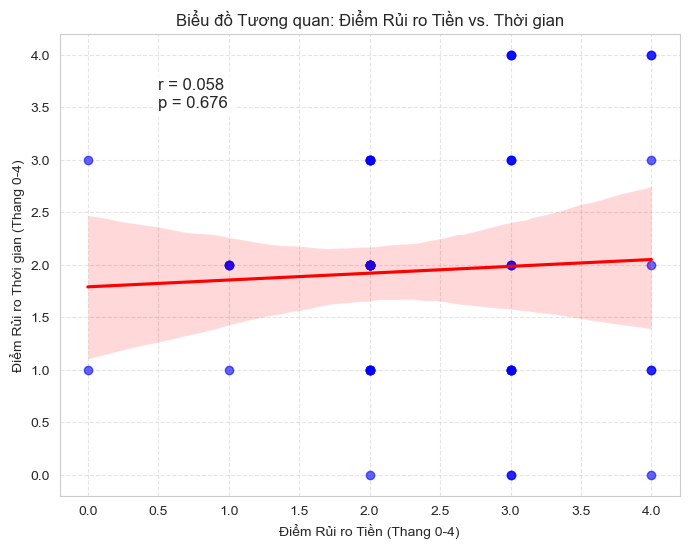

In [14]:
test_data_clean['Score_Money'] = test_data_clean[['Q1_Money_Gain_Small', 'Q3_Money_Loss_Small', 'Q5_Money_Gain_Med', 'Q7_Money_Loss_Med']].sum(axis=1)
test_data_clean['Score_Time'] = test_data_clean[['Q2_Time_Gain_Small', 'Q4_Time_Loss_Small', 'Q6_Time_Gain_Med', 'Q8_Time_Loss_Med']].sum(axis=1)

# 2. Tính hệ số tương quan Pearson
# Chỉ lấy các dòng có đủ dữ liệu
valid_data = test_data_clean[['Score_Money', 'Score_Time']].dropna()

if len(valid_data) > 0:
    r_stat, p_val = stats.pearsonr(valid_data['Score_Money'], valid_data['Score_Time'])
    
    print(f"Số lượng mẫu quan sát: N = {len(valid_data)}")
    print(f"Hệ số tương quan Pearson (r): {r_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    
    print("-" * 60)
    # 3. Biện luận kết quả
    if p_val < 0.05:
        print("KẾT LUẬN: Có sự tương quan có ý nghĩa thống kê.")
        if r_stat > 0.5:
            print("=> Mức độ nhất quán CAO (Hành vi Tiền và Thời gian đi đôi với nhau).")
        elif r_stat > 0.3:
            print("=> Mức độ nhất quán TRUNG BÌNH.")
        else:
            print("=> Mức độ nhất quán THẤP.")
    else:
        print("KẾT LUẬN: KHÔNG CÓ SỰ TƯƠNG QUAN (p > 0.05).")
        print("=> Hành vi ra quyết định với Tiền và Thời gian là ĐỘC LẬP.")
        print("=> Một người liều với Tiền chưa chắc đã liều với Thời gian.")

    # 4. Vẽ biểu đồ phân tán (Scatter Plot) để trực quan hóa
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Score_Money', y='Score_Time', data=valid_data, 
                scatter_kws={'alpha':0.6, 'color': 'blue'}, line_kws={'color':'red'})
    plt.title('Biểu đồ Tương quan: Điểm Rủi ro Tiền vs. Thời gian')
    plt.xlabel('Điểm Rủi ro Tiền (Thang 0-4)')
    plt.ylabel('Điểm Rủi ro Thời gian (Thang 0-4)')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Thêm chú thích r và p vào biểu đồ
    plt.text(0.5, 3.5, f'r = {r_stat:.3f}\np = {p_val:.3f}', 
             bbox=dict(facecolor='white', alpha=0.8), fontsize=12)
    plt.show()

else:
    print("Không đủ dữ liệu để tính tương quan.")

### 1. Phân tích các chỉ số thống kê

* **Hệ số tương quan Pearson (r) = 0.0576:**
* Giá trị này **gần như bằng 0** (rất sát mốc 0). Trong thống kê,  chạy từ -1 đến +1. Khi , điều này biểu thị rằng **không có mối liên hệ tuyến tính nào** giữa hai biến số.
* **Ý nghĩa:** Đường biểu diễn trên đồ thị gần như nằm ngang. Việc điểm rủi ro về Tiền tăng hay giảm hoàn toàn không giúp chúng ta dự đoán được điểm rủi ro về Thời gian.

* **P-value = 0.6764:**
* Giá trị này **lớn hơn rất nhiều** so với mức ý nghĩa tiêu chuẩn (0.05).
* **Ý nghĩa:** Kết luận về sự "không liên quan" này là đáng tin cậy.

### 2. Kết luận cho Giả thuyết H5

Dựa trên nguyên tắc kiểm định:

* **Giả thuyết H5:** *"Có sự nhất quán trong hành vi ra quyết định về tiền và thời gian"*.
* **Kết quả thực tế:** Không tìm thấy sự tương quan.

 **KẾT LUẬN: BÁC BỎ GIẢ THUYẾT H5.**